In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.rename(columns={0:'months_as_customer', 1: 'age', 2:'policy_number',3: 'policy_blind_date', 4: 'policy_state', 5:'policy_cslt',6: 'policy_deductable', 7:'policy_annual_premium',8: 'umbrella_limit', 9:'insured_zip',10: 'insured_sex', 11:'insured_education_level',12: 'insured_occupation',13: 'insured_hobbies',14: 'insured_relationship',15: 'capital-gains',16: 'capital-loss',17:'incident_date',18:'incident_type', 19:'collision_type',20:'Incident_severity',21: '‘authorities_contacted',22:'incident_state',23: '‘incident_city',24: 'incident_location',25: 'incident_hour_of_the_day', 26:'number_of_vehicles_involved',27: 'property_damage',28: 'bodily_injuries',29: 'witnesses',30: 'police_report_available',31:'total_claim_amount',32: 'injury_claim', 33:'‘property_claim',34: 'vehicle_claim',35:'auto_make',36: 'auto_model',37: 'auto_year',38: 'fraud_reported'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_blind_date            1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_cslt                  1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df

,months_as_customer,age,policy_number,policy_blind_date,policy_state,policy_cslt,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,‘property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [7]:
df.duplicated('policy_number').sum()

0

In [8]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                             Missing Values  % Missing data
‘authorities_contacted                   91             9.1
witnesses                                 0             0.0
incident_state                            0             0.0
‘incident_city                            0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
property_damage                           0             0.0
bodily_injuries                           0             0.0
months_as_customer                        0             0.0
Incident_severity                         0             0.0
total_claim_amount                        0             0.0
injury_claim                              0             0.0
‘property_claim                           0             0.0
vehicle_claim                             0             0.0
auto_make                               

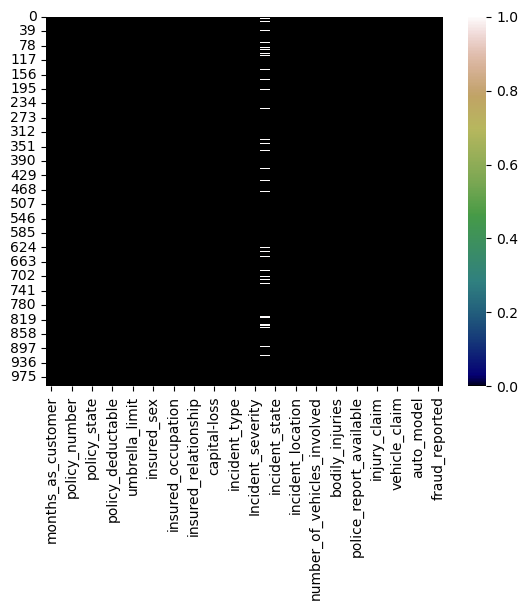

In [9]:
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

In [10]:
df['CSL_Personal']=df.policy_cslt.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_cslt.str.split('/',expand=True)[1]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_blind_date            1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_cslt                  1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [12]:
df['policy_blind_date']=pd.to_datetime(df['policy_blind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_blind_date            1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_cslt                  1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [14]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_blind_date'].dt.day
df['policy_bind_month'] = df['policy_blind_date'].dt.month
df['policy_bind_year'] = df['policy_blind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [15]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_blind_date','incident_date'],axis=1,inplace=True)

In [16]:
df

,months_as_customer,age,policy_number,policy_state,policy_cslt,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2004,Y,250,500,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,2007,Y,250,500,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2007,N,100,300,6,9,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2014,Y,250,500,25,5,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,2009,N,500,1000,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,2006,N,500,1000,16,7,1991,22,2,2015
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,2015,N,100,300,5,1,2014,24,1,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,1996,N,250,500,17,2,2003,23,1,2015
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1998,N,500,1000,18,11,2011,26,2,2015


In [17]:
df['incident_year'].unique()

array([2015])

because incident date is same we can drop that column

In [18]:
df.drop(['incident_year'], axis=1, inplace=True)


In [19]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'Incident_severity',
            '‘authorities_contacted','incident_state', '‘incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model']
    
Numerical = ['months_as_customer','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', '‘property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']


In [20]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking      

ANALYSING AGE VS FrAUD

In [21]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


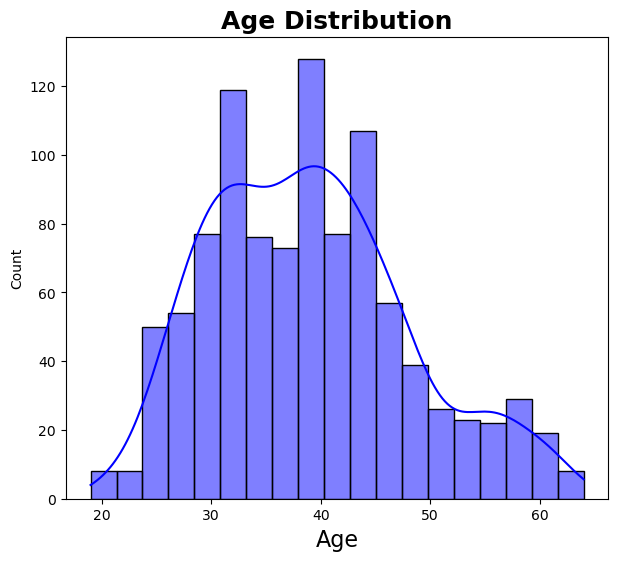

In [22]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

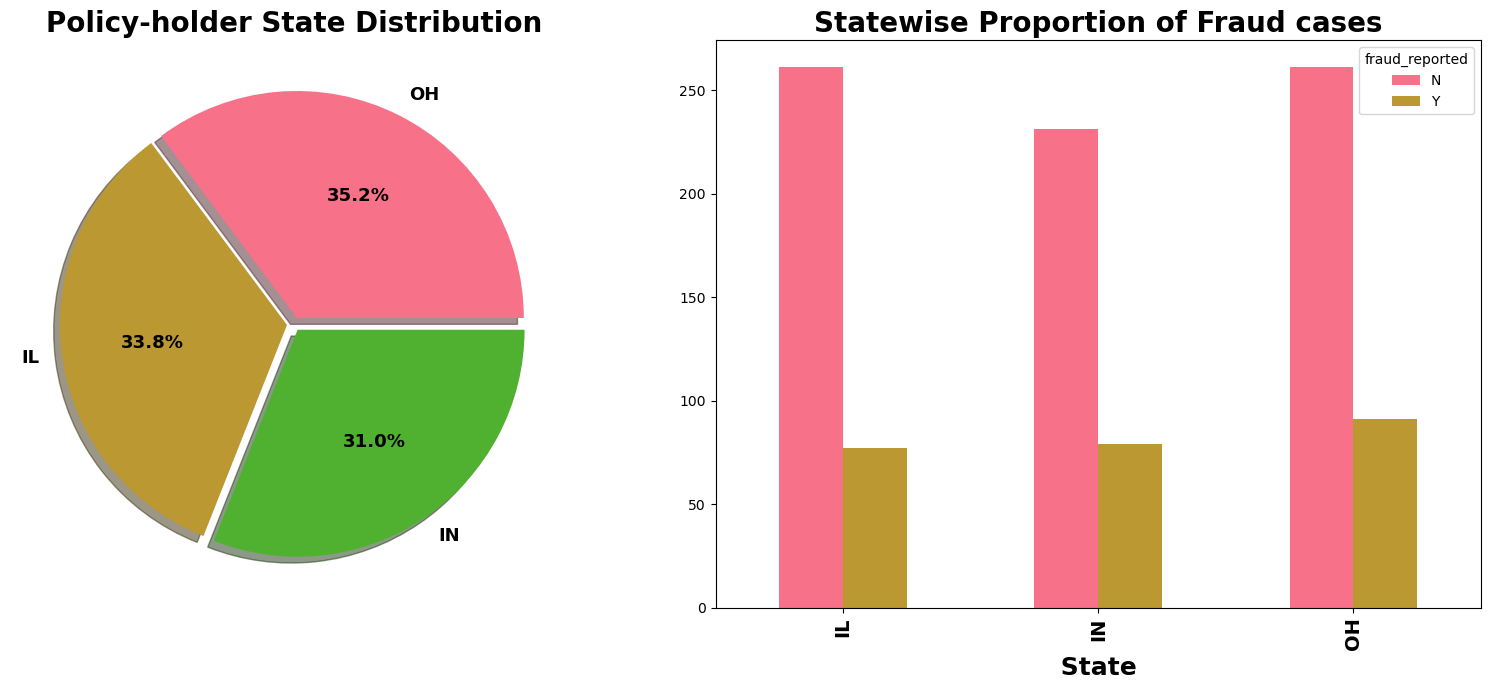

In [23]:
#Insured Gender VS Fraud cases
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

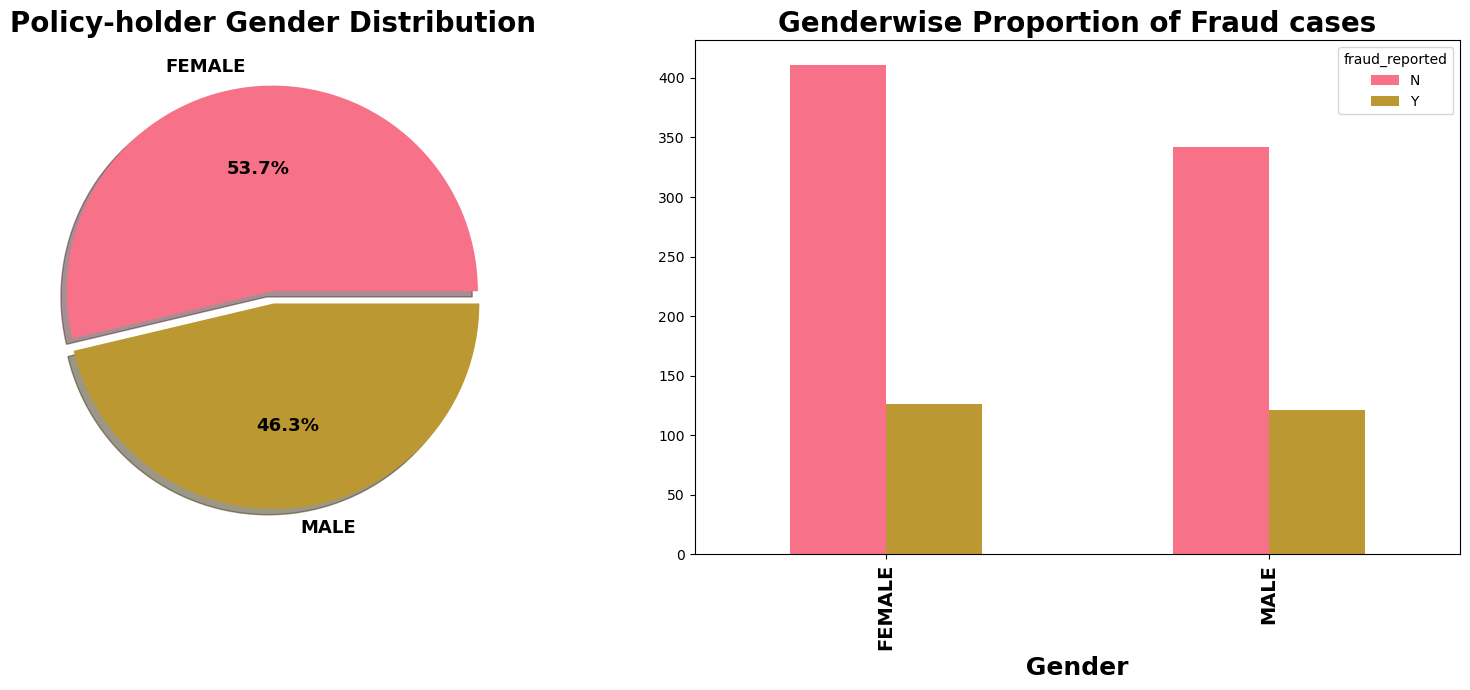

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

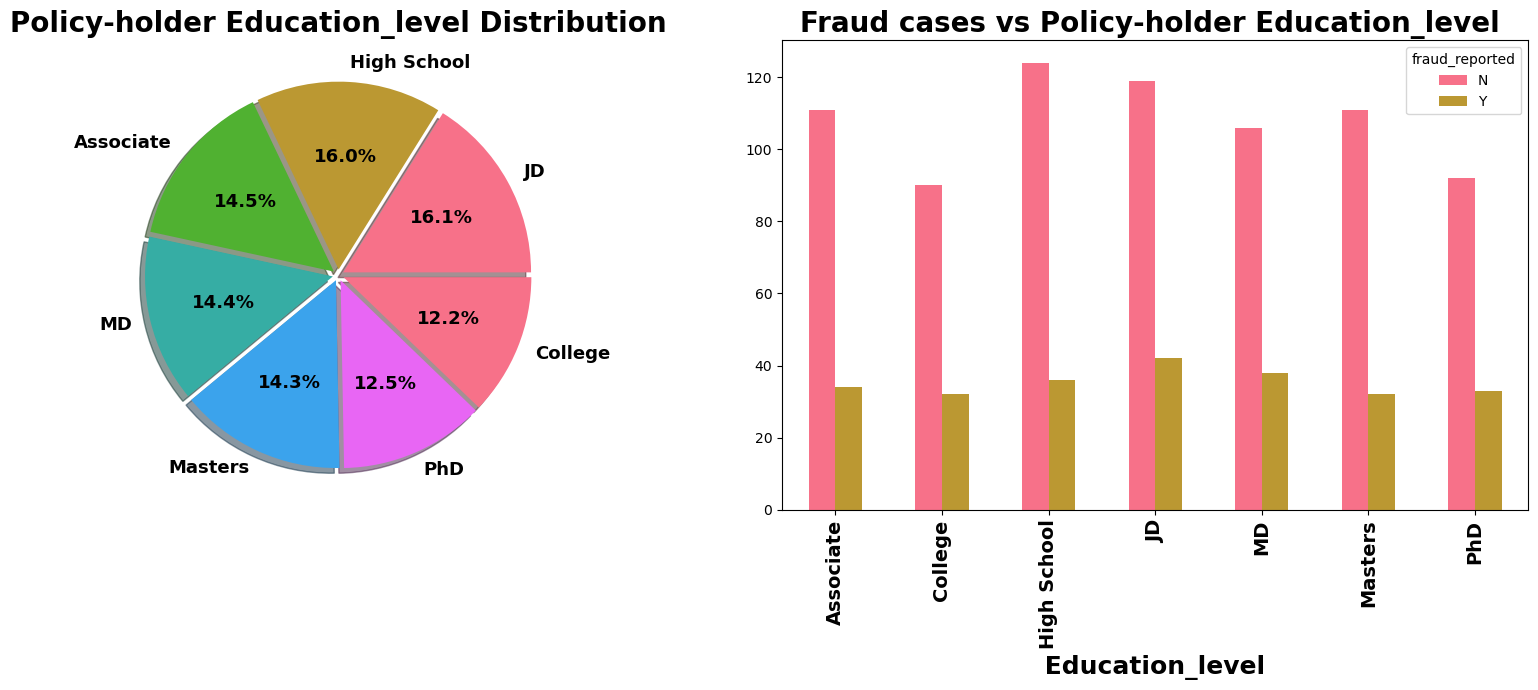

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [26]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()


,months_as_customer,age,policy_number,policy_state,policy_cslt,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,2,250/500,1000,1406.91,0,466132,1,...,1,2004,Y,250,500,17,10,2014,25,1
1,228,42,342868,1,250/500,2000,1197.22,5000000,468176,1,...,12,2007,Y,250,500,27,6,2006,21,1
2,134,29,687698,2,100/300,2000,1413.14,5000000,430632,0,...,30,2007,N,100,300,6,9,2000,22,2
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,0,...,34,2014,Y,250,500,25,5,1990,10,1
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,1,...,31,2009,N,500,1000,6,6,2014,17,2


In [43]:
df.drop('policy_cslt', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_cslt                  1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

In [27]:
#Feature selection and Engineering
#1. Outliers Detection and Removal
Numerical = [Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', '‘property_claim ', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']


In [31]:
len(Numerical)

18

KeyError: 'Automobile_Age'

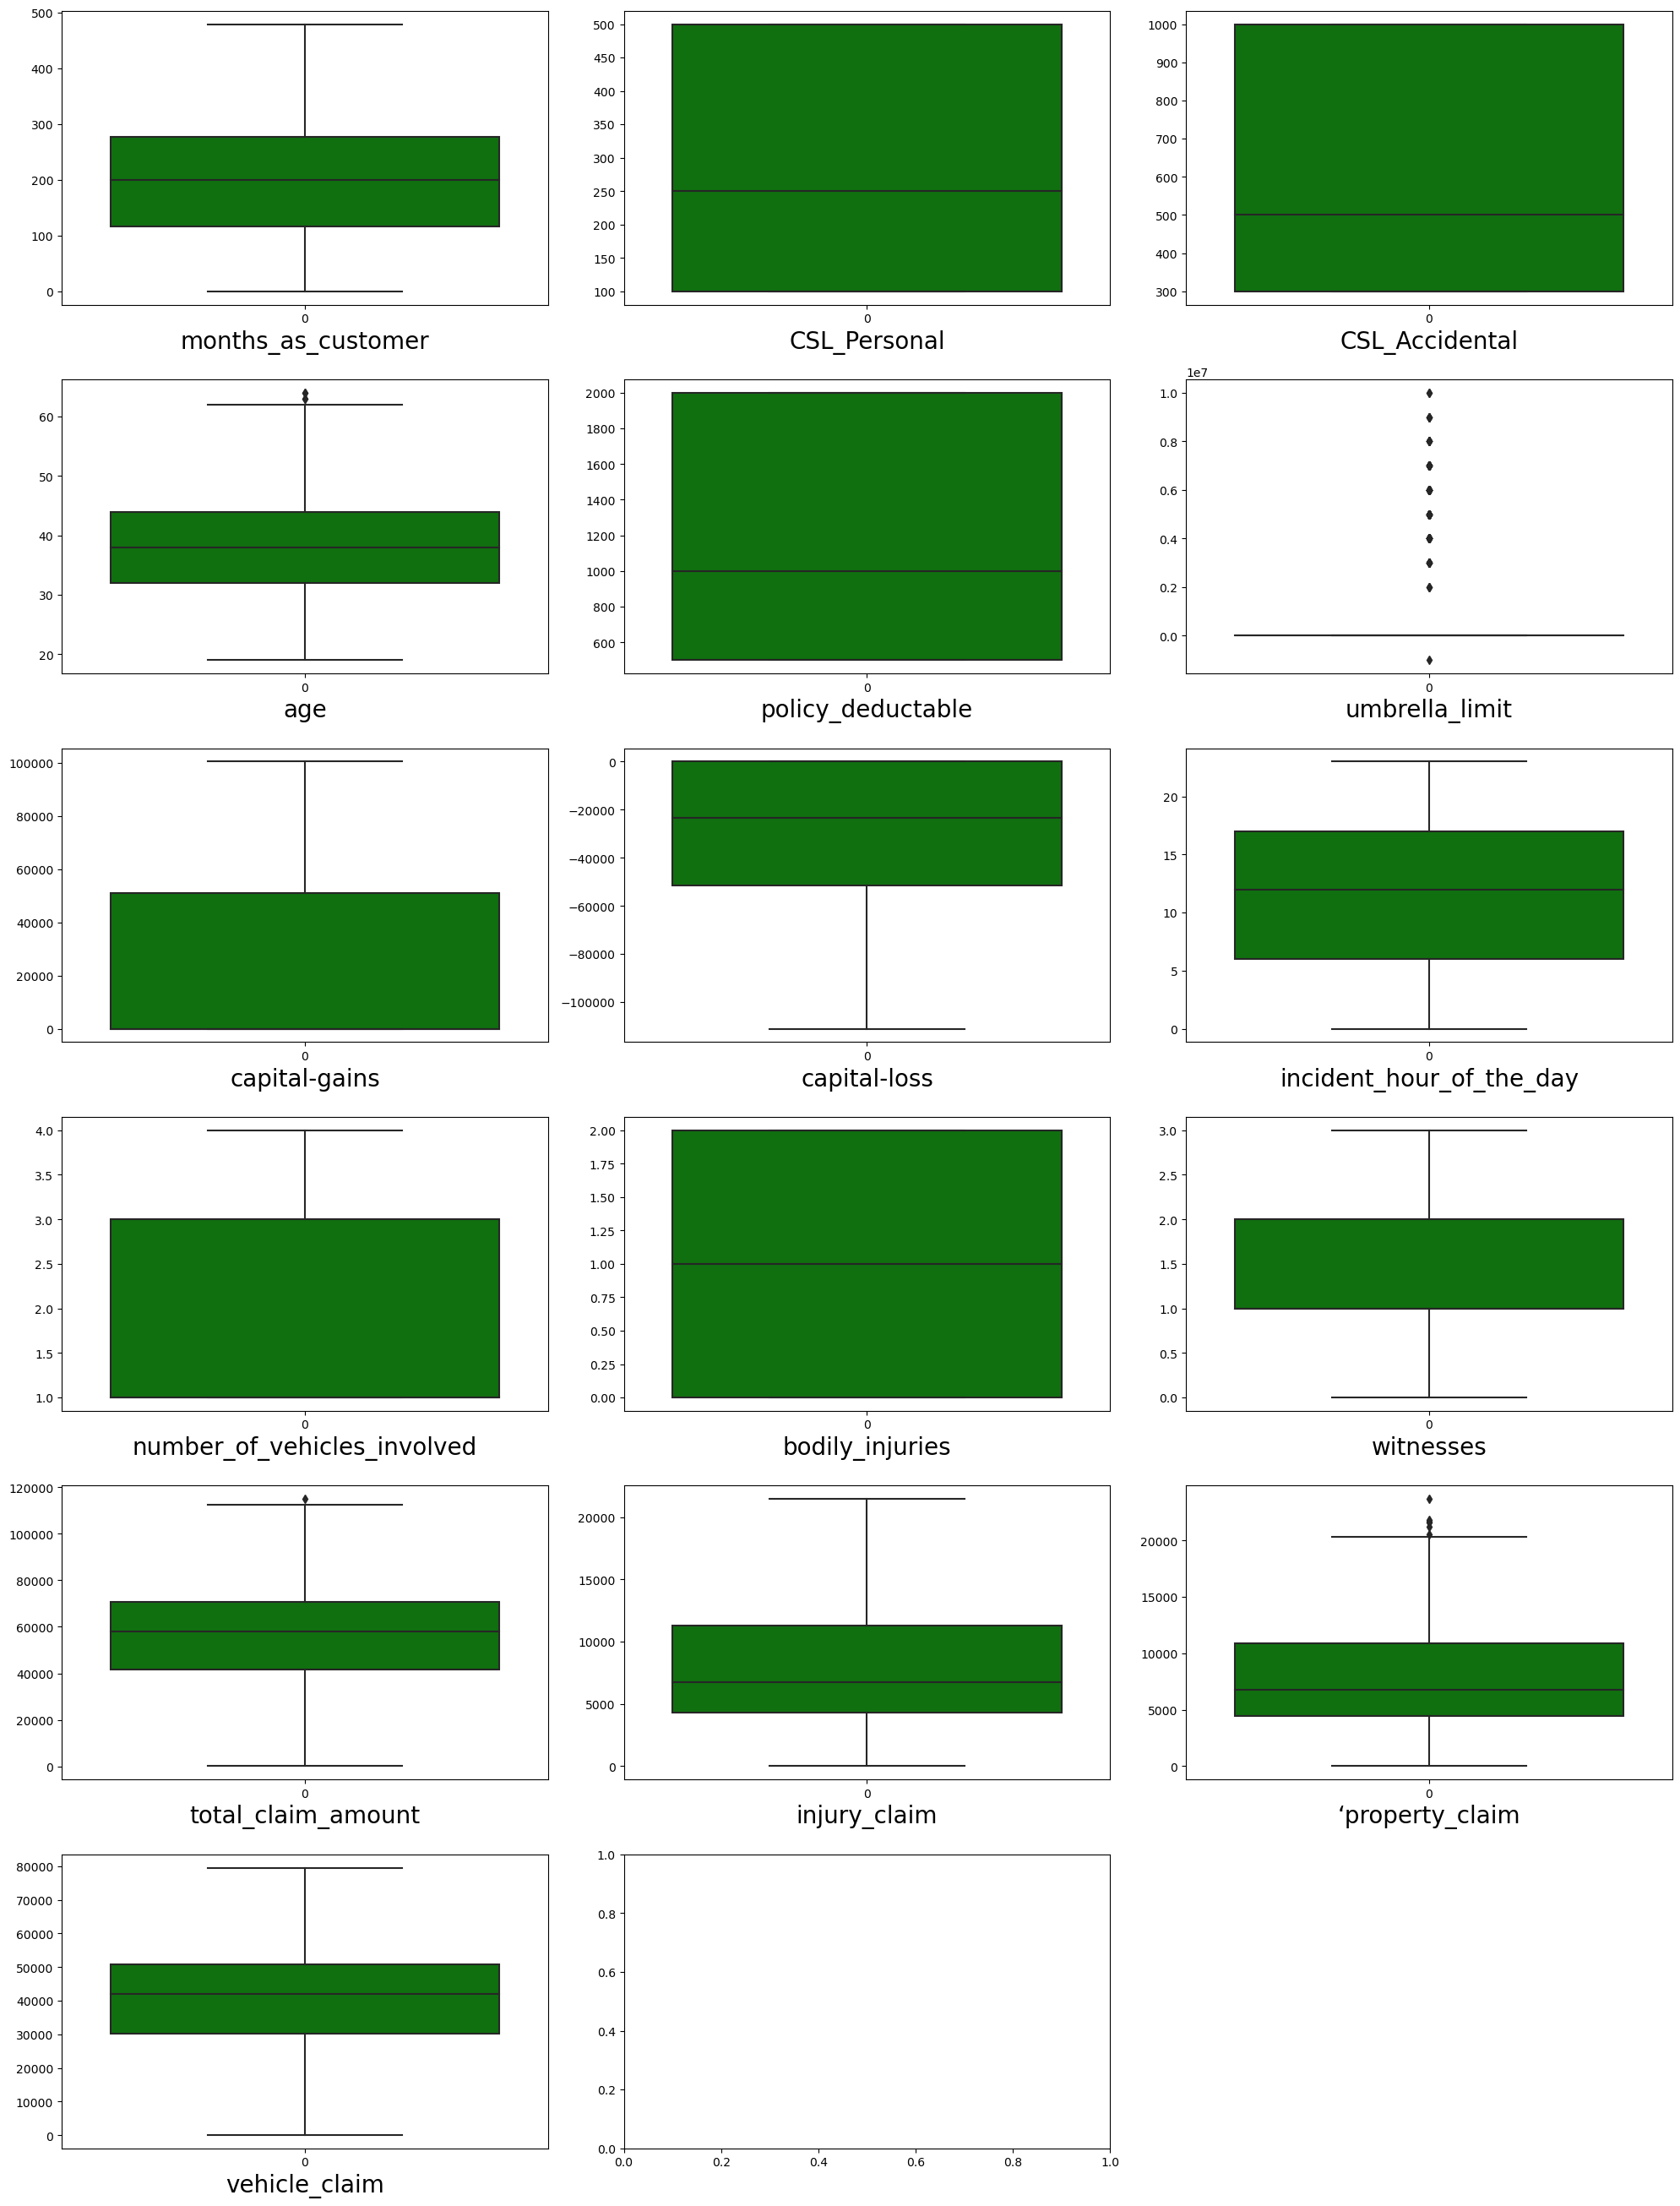

In [33]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber <= 18:
        ax = plt.subplot(7, 3, plotnumber)
        sns.boxplot(df[column], color='g')
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.show()

In [34]:
from scipy.stats import zscore

# Assuming df is your DataFrame and it has both numerical and non-numerical columns

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the z-scores
z = np.abs(zscore(numerical_df))

# Define the threshold
threshold = 3

# Identify rows where all z-scores are less than the threshold
df1 = df[(z < threshold).all(axis=1)]

# Print the shapes and data loss percentage
print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df1.shape)
print("Percentage of data loss post outlier removal: ", (df.shape[0] - df1.shape[0]) / df.shape[0] * 100)

# Update df to be the new DataFrame without outliers
df = df1.copy()

Shape of the dataframe before removing outliers:  (1000, 44)
Shape of the dataframe after removing outliers:  (980, 44)
Percentage of data loss post outlier removal:  2.0


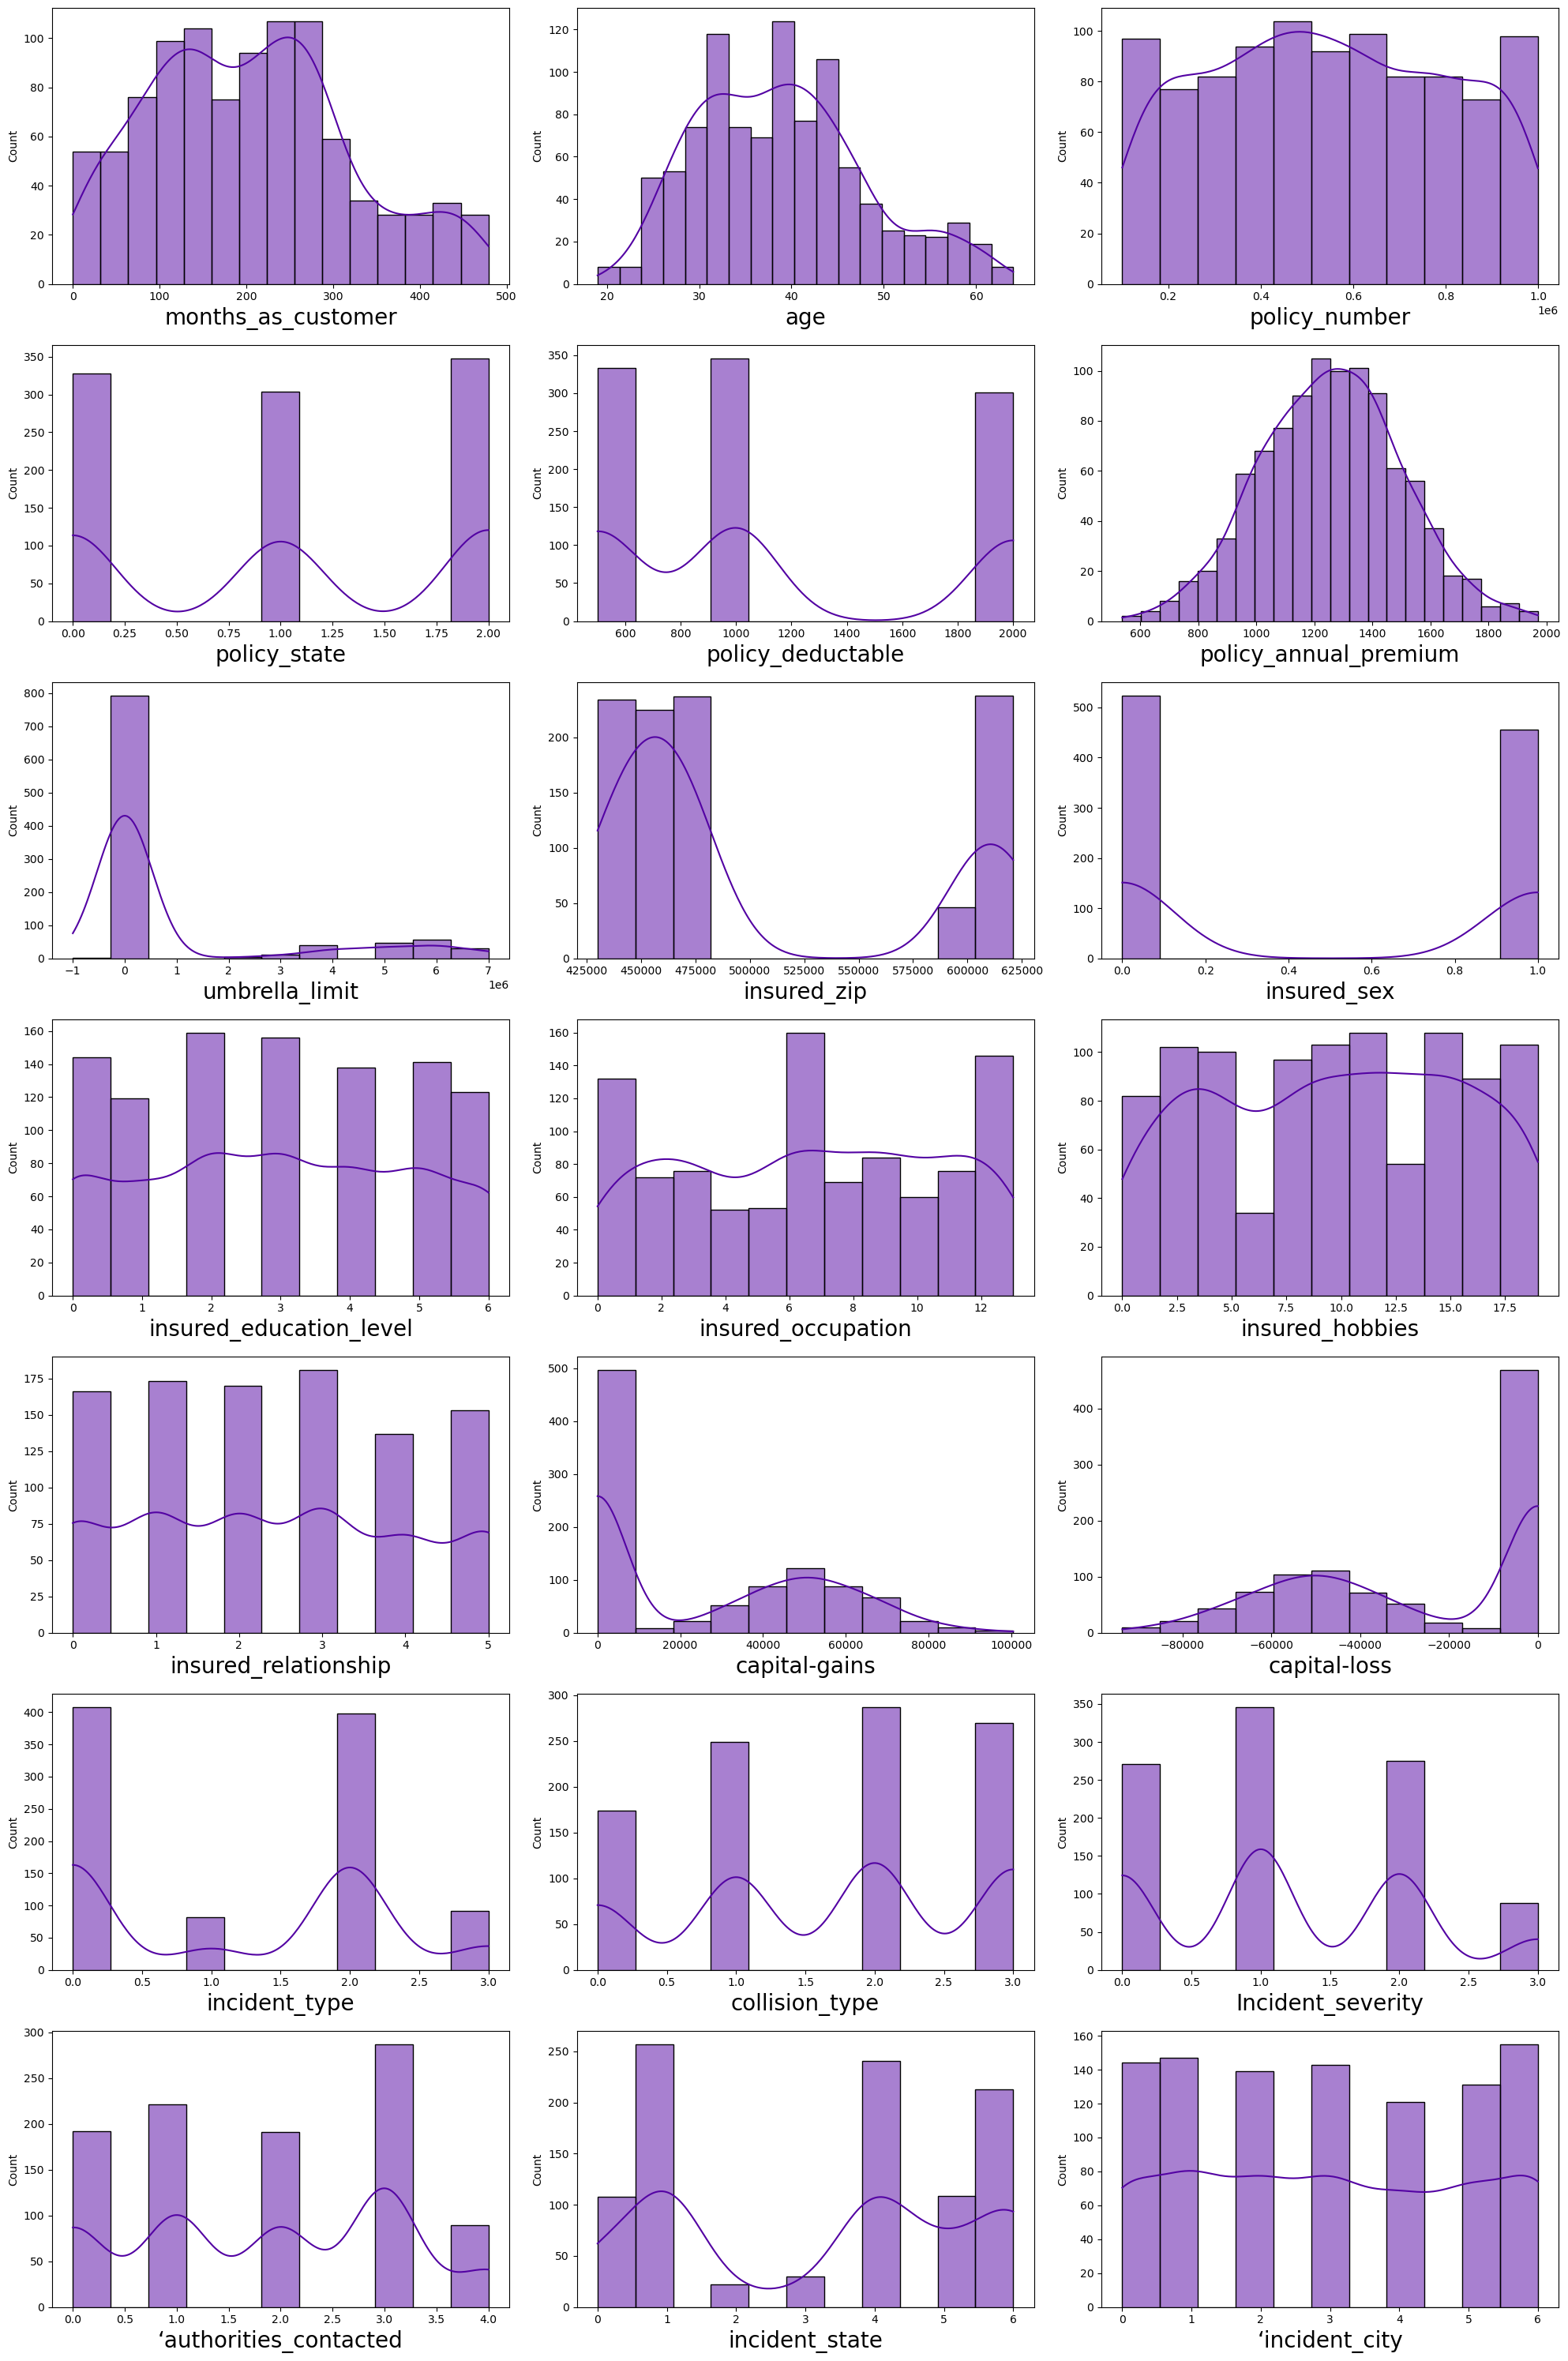

In [36]:
# Ensure Numerical contains only numerical column names
Numerical = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20,30), facecolor='white')
sns.set_palette('plasma')
plotnum = 1

for col in Numerical:
    if plotnum <= 21:
        plt.subplot(7, 3, plotnum)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize=20)
    plotnum += 1

plt.tight_layout()
plt.show()


In [37]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
Incident_severity              0.277726
‘authorities_contacted        -0.031142
incident_state                -0.149255
‘incident_city                 0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757


In [39]:
df[Numerical].corr()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,‘property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922960,0.061267,-0.007183,0.031041,-0.003814,0.018213,0.029572,0.059644,-0.000731,...,0.036660,0.055941,0.049734,0.005130,0.000869,0.055263,-0.007080,-0.041914,-0.002511,-0.048064
age,0.922960,1.000000,0.062332,-0.020012,0.032036,0.005330,0.013256,0.035864,0.073790,0.001647,...,0.062375,0.058918,0.033757,0.015322,0.005594,0.057361,0.003470,-0.031709,0.002183,-0.038622
policy_number,0.061267,0.062332,1.000000,0.071343,-0.009812,0.028686,-0.000145,0.004531,0.007069,-0.033767,...,-0.011147,-0.018152,0.016494,0.064599,-0.005574,0.054672,-0.003173,-0.041632,0.047356,-0.035409
policy_state,-0.007183,-0.020012,0.071343,1.000000,0.017612,0.015089,-0.010921,0.020669,-0.018002,-0.027173,...,-0.006420,-0.006411,0.010259,-0.018008,-0.001160,0.011512,0.041076,-0.003045,0.028847,0.016468
policy_deductable,0.031041,0.032036,-0.009812,0.017612,1.000000,-0.008300,0.013471,-0.004399,-0.006977,0.014101,...,0.071031,0.005279,-0.028032,-0.002591,0.030569,0.003048,-0.026562,-0.054041,-0.023542,-0.035427
policy_annual_premium,-0.003814,0.005330,0.028686,0.015089,-0.008300,1.000000,-0.014107,0.047651,0.041312,-0.021400,...,-0.014073,0.009521,0.009311,-0.038226,-0.042446,-0.041995,-0.007240,0.002433,0.029000,-0.048292
umbrella_limit,0.018213,0.013256,-0.000145,-0.010921,0.013471,-0.014107,1.000000,0.004481,0.018068,-0.030887,...,-0.021380,-0.048740,0.012857,0.015360,0.027952,-0.019083,-0.029563,0.049032,-0.027764,0.005505
insured_zip,0.029572,0.035864,0.004531,0.020669,-0.004399,0.047651,0.004481,1.000000,-0.038086,0.017201,...,-0.007904,-0.042364,-0.020518,0.021858,-0.041291,-0.045911,0.030541,-0.003239,0.024635,-0.033407
insured_sex,0.059644,0.073790,0.007069,-0.018002,-0.006977,0.041312,0.018068,-0.038086,1.000000,0.010068,...,-0.008744,-0.022720,0.019996,-0.018657,-0.033336,0.046103,0.000967,-0.031230,-0.005235,-0.025516
insured_education_level,-0.000731,0.001647,-0.033767,-0.027173,0.014101,-0.021400,-0.030887,0.017201,0.010068,1.000000,...,0.062230,0.072782,0.060043,0.042735,0.054438,0.046252,-0.080239,0.016874,-0.032980,-0.050898


In [53]:
df.drop(['incident_location'],axis = 1,inplace=True)

In [54]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']


In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.924653,months_as_customer
1,6.934780,age
2,1.037869,policy_number
3,1.037696,policy_state
4,1.047389,policy_deductable
5,1.042049,policy_annual_premium
6,1.042932,umbrella_limit
7,1.041309,insured_zip
8,1.037602,insured_sex
9,1.053749,insured_education_level


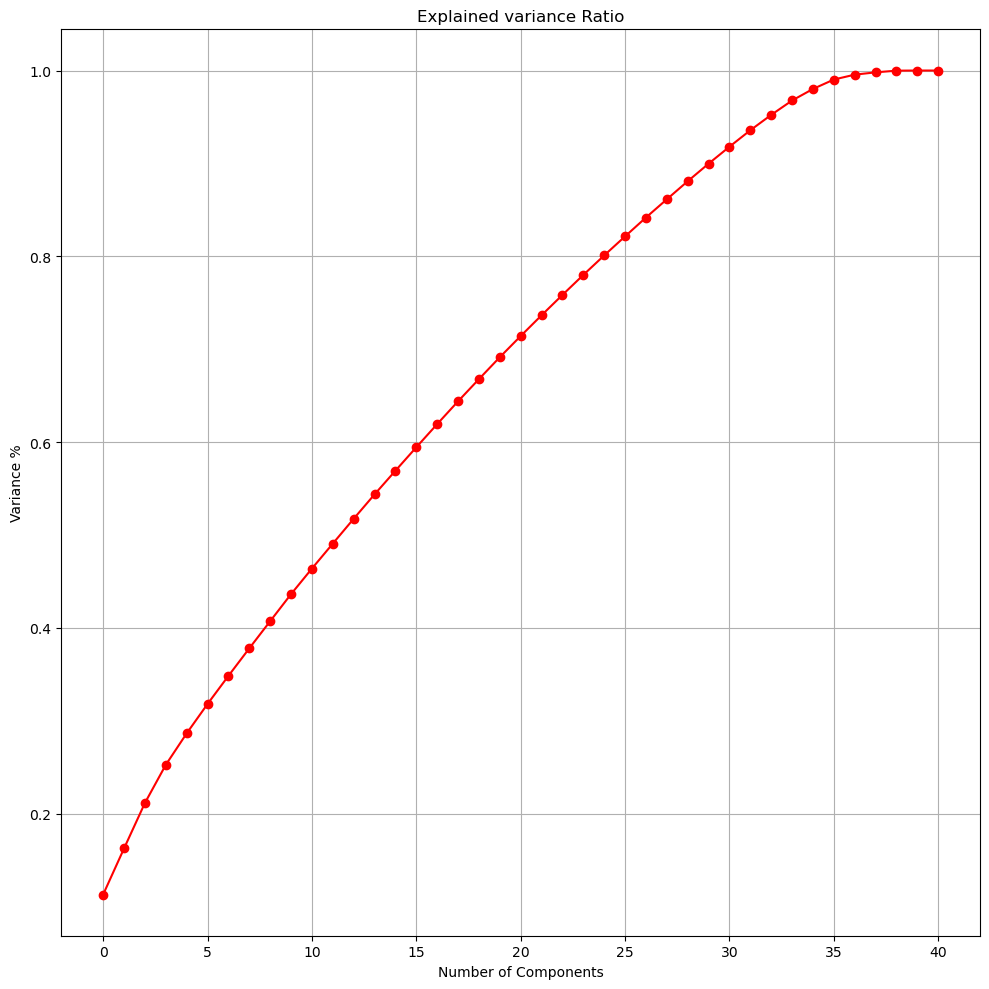

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (686, 41)
Training target vector size: (686,)
Test feature matrix size: (294, 41)
Test target vector size: (294,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)


Best accuracy is 0.8095238095238095 on Random_state 179


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7755102040816326


Confusion matrix of Logistics Regression : 
 [[228   0]
 [ 66   0]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           N       0.78      1.00      0.87       228
           Y       0.00      0.00      0.00        66

    accuracy                           0.78       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.60      0.78      0.68       294



In [64]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')


Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7755102040816326


Confusion matrix : 
 [[228   0]
 [ 66   0]]


Classification Report : 
               precision    recall  f1-score   support

           N       0.78      1.00      0.87       228
           Y       0.00      0.00      0.00        66

    accuracy                           0.78       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.60      0.78      0.68       294



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7755102040816326


Confusion matrix : 
 [[228   0]
 [ 66   0]]


Classification Report : 
               precision    recall  f1-score   support

           N       0.78      1.00      0.87       228
           Y       0.00      0.00      0.00        66

    accuracy                           0.78       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.60      0.78      0.68     

In [66]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.75510204 0.76020408 0.74489796 0.75510204 0.75510204]
Mean Score : 0.7540816326530612
Std deviation : 0.004998958658741158




Cross Validation Score SVC() :

Score : [0.75510204 0.75510204 0.75510204 0.75510204 0.75510204]
Mean Score : 0.7551020408163265
Std deviation : 0.0




Cross Validation Score GaussianNB() :

Score : [0.70408163 0.66836735 0.53061224 0.71938776 0.70408163]
Mean Score : 0.6653061224489797
Std deviation : 0.06940275948217121




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79081633 0.79081633 0.76530612 0.81632653 0.77040816]
Mean Score : 0.786734693877551
Std deviation : 0.01808167872109119




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.66836735 0.69897959 0.6377551  0.67857143 0.62244898]
Mean Score : 0.6612244897959184
Std deviation : 0.027682979522960293




Cross Validation Score RandomForestClassifier() :

Score : [0.80102041 0.78061224 0.7755102  0.76

In [67]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.7959183673469388


In [68]:
prediction = Final_mod.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,N,N
1,N,N
2,N,N
3,N,Y
4,N,N
